In [60]:
# 📌 Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from scipy.stats import f
import statsmodels.api as sm



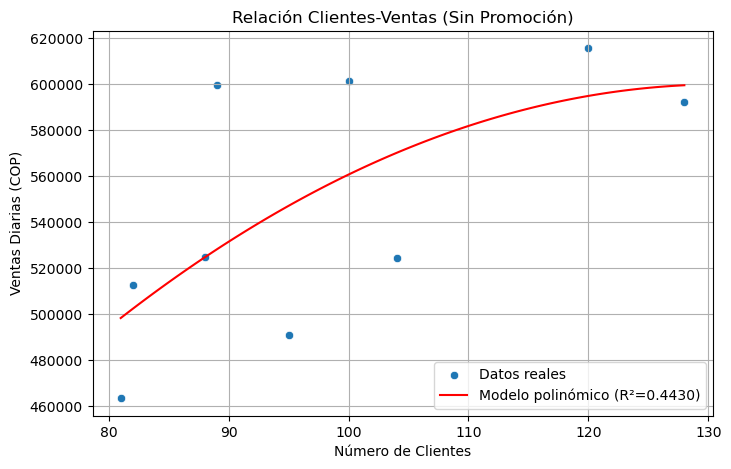

Coeficientes del modelo:
 b0 = -95319.01, b1 = 10601.29, b2 = -40.41
Coeficiente de determinación R²: 0.4430
Coeficiente de correlación R: 0.6465
Número óptimo de clientes para maximizar ventas: 131.18


In [90]:
# 📌 Cargar datos
data = {
    "Dia": range(1, 31),
    "Promoción": [
        "2x1 en bebidas", "Combo especial", "Sin promoción", "2x1 en bebidas", "2x1 en bebidas",
        "Combo especial", "Sin promoción", "Sin promoción", "2x1 en bebidas", "Descuento 10%",
        "2x1 en bebidas", "2x1 en bebidas", "2x1 en bebidas", "2x1 en bebidas", "Combo especial",
        "Sin promoción", "Combo especial", "Combo especial", "Combo especial", "2x1 en bebidas",
        "Descuento 10%", "Sin promoción", "Descuento 10%", "Combo especial", "Combo especial",
        "Descuento 10%", "Sin promoción", "Sin promoción", "Sin promoción", "Sin promoción"
    ],
    "Numero_Clientes": [
        130, 163, 104, 151, 137, 163, 82, 88, 148, 125,
        111, 116, 153, 123, 136, 81, 125, 148, 137, 157,
        114, 95, 144, 145, 144, 140, 128, 100, 89, 120
    ],
    "Ventas_Diarias_COP": [
        643871.34, 671161.45, 524493.35, 554283.72, 606662.37, 601960.70, 512510.33, 524973.86, 539198.41, 608582.71,
        581948.80, 655568.35, 583990.54, 599834.16, 649676.35, 463374.69, 634689.99, 583197.49, 631559.15, 626452.83,
        571530.55, 490966.89, 598211.01, 608855.75, 635308.55, 522108.80, 592463.68, 601632.45, 599823.47, 615723.63
    ]
}

df = pd.DataFrame(data)

# 📌 Filtrar datos SIN promoción
df_sin_promo = df[df["Promoción"] == "Sin promoción"]

# 📌 Extraer X e Y
X = df_sin_promo["Numero_Clientes"].values.reshape(-1, 1)
Y = df_sin_promo["Ventas_Diarias_COP"].values

# 📌 Transformación polinómica (grado 2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# 📌 Ajustar modelo
modelo_polinomico = LinearRegression()
modelo_polinomico.fit(X_poly, Y)

# 📌 Obtener coeficientes
b0 = modelo_polinomico.intercept_  # Término independiente
b1 = modelo_polinomico.coef_[1]    # Coeficiente de X
b2 = modelo_polinomico.coef_[2]    # Coeficiente de X^2

# 📌 Calcular métricas de ajuste
r2 = r2_score(Y, modelo_polinomico.predict(X_poly))  # R²
r = np.corrcoef(df_sin_promo["Numero_Clientes"], df_sin_promo["Ventas_Diarias_COP"])[0, 1]  # R (correlación de Pearson)

# 📌 Calcular X óptimo (máximo de la parábola)
if b2 != 0:  
    X_optimo = -b1 / (2 * b2)
else:
    X_optimo = None  # No se puede calcular si no hay término cuadrático

# 📌 Graficar modelo
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_range_poly = poly.transform(X_range)
Y_pred = modelo_polinomico.predict(X_range_poly)

plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_sin_promo["Numero_Clientes"], y=df_sin_promo["Ventas_Diarias_COP"], label="Datos reales")
plt.plot(X_range, Y_pred, color="red", label=f"Modelo polinómico (R²={r2:.4f})")
plt.xlabel("Número de Clientes")
plt.ylabel("Ventas Diarias (COP)")
plt.title("Relación Clientes-Ventas (Sin Promoción)")
plt.legend()
plt.grid()

plt.savefig("imagenes/regresion_poly.png", dpi=300, bbox_inches="tight")
plt.show()

# 📌 Mostrar resultados
print(f"Coeficientes del modelo:\n b0 = {b0:.2f}, b1 = {b1:.2f}, b2 = {b2:.2f}")
print(f"Coeficiente de determinación R²: {r2:.4f}")
print(f"Coeficiente de correlación R: {r:.4f}")
if X_optimo:
    print(f"Número óptimo de clientes para maximizar ventas: {X_optimo:.2f}")
else:
    print("No se puede calcular un X óptimo válido.")




In [62]:
# 📌 Filtrar solo los datos sin promoción
df_sin_promo = df[df['Promoción'] == 'Sin promoción'].copy()

# 📌 Reiniciar los índices para evitar problemas en el futuro
df_sin_promo.reset_index(drop=True, inplace=True)

# 📌 Mostrar las primeras filas para verificar
df_sin_promo.head()

df_sin_promo.sample(9)



,Dia,Promoción,Numero_Clientes,Ventas_Diarias_COP
7,29,Sin promoción,89,599823.47
5,27,Sin promoción,128,592463.68
4,22,Sin promoción,95,490966.89
0,3,Sin promoción,104,524493.35
1,7,Sin promoción,82,512510.33
6,28,Sin promoción,100,601632.45
2,8,Sin promoción,88,524973.86
3,16,Sin promoción,81,463374.69
8,30,Sin promoción,120,615723.63


In [63]:
# 📌 Datos sin promoción
df_sin_promo = df[df["Promoción"] == "Sin promoción"]
X = df_sin_promo["Numero_Clientes"].values.reshape(-1, 1)
Y = df_sin_promo["Ventas_Diarias_COP"].values

# 📌 Transformación polinómica
degree = 2  # Modelo cuadrático
poly = PolynomialFeatures(degree=degree)
X_poly = poly.fit_transform(X)

# 📌 Ajustar modelo
modelo = LinearRegression()
modelo.fit(X_poly, Y)
Y_pred = modelo.predict(X_poly)

# 📌 ANOVA
SCT = np.sum((Y - np.mean(Y))**2)  # Suma de Cuadrados Total
SCM = np.sum((Y_pred - np.mean(Y))**2)  # Suma de Cuadrados del Modelo
SCR = np.sum((Y - Y_pred)**2)  # Suma de Cuadrados del Residuo

# 📌 Grados de libertad
GLM = degree  # Grados de libertad del modelo
GLR = len(Y) - (degree + 1)  # Grados de libertad del residuo

# 📌 Media cuadrática
MCM = SCM / GLM  # Media cuadrática del modelo
MCR = SCR / GLR  # Media cuadrática del residuo

# 📌 Estadístico F
F = MCM / MCR

# 📌 Valor p
p_value = 1 - f.cdf(F, GLM, GLR)

# 📌 Mostrar resultados
print("Suma de Cuadrados Total (SCT):", SCT)
print("Suma de Cuadrados del Modelo (SCM):", SCM)
print("Suma de Cuadrados del Residuo (SCR):", SCR)
print("Grados de Libertad del Modelo (GLM):", GLM)
print("Grados de Libertad del Residuo (GLR):", GLR)
print("Estadístico F:", F)
print("Valor p:", p_value)

Suma de Cuadrados Total (SCT): 24878071400.959396
Suma de Cuadrados del Modelo (SCM): 11020967083.129562
Suma de Cuadrados del Residuo (SCR): 13857104317.828108
Grados de Libertad del Modelo (GLM): 2
Grados de Libertad del Residuo (GLR): 6
Estadístico F: 2.3859892002726006
Valor p: 0.17280938690620617


In [67]:
import numpy as np
import statsmodels.api as sm
import pandas as pd
from scipy.stats import f  # 📌 Importar distribución F

# 📌 Definir variables
X_poly_const = sm.add_constant(X_poly)  # Agregar término de intercepción
modelo_ols = sm.OLS(Y, X_poly_const).fit()  # Ajustar modelo con OLS

# 📌 Calcular ANOVA manualmente
anova_tabla = pd.DataFrame({
    "Fuente": ["Regresión", "Residuales", "Total"],
    "SC": [modelo_ols.ess, modelo_ols.ssr, modelo_ols.centered_tss],  # Sumas de cuadrados
    "GL": [X_poly_const.shape[1] - 1, len(Y) - X_poly_const.shape[1], len(Y) - 1],  # Grados de libertad
})

# 📌 Calcular cuadrado medio y F-valor
anova_tabla["CM"] = anova_tabla["SC"] / anova_tabla["GL"]
anova_tabla.loc[0, "F"] = anova_tabla.loc[0, "CM"] / anova_tabla.loc[1, "CM"]  # Estadístico F
anova_tabla.loc[0, "p-valor"] = f.sf(anova_tabla.loc[0, "F"], anova_tabla.loc[0, "GL"], anova_tabla.loc[1, "GL"])  # 📌 Usar scipy.stats.f.sf()

# 📌 Mostrar tabla
print("ANOVA del modelo polinómico (sin promoción):")
print(anova_tabla)



ANOVA del modelo polinómico (sin promoción):
       Fuente            SC  GL            CM         F   p-valor
0   Regresión  1.102097e+10   2  5.510484e+09  2.385989  0.172809
1  Residuales  1.385710e+10   6  2.309517e+09       NaN       NaN
2       Total  2.487807e+10   8  3.109759e+09       NaN       NaN


In [70]:
# 📌 Calcular predicciones y sus intervalos
X_poly_const = sm.add_constant(X_poly)  # Agregar término de intercepción
predicciones = modelo_ols.get_prediction(X_poly_const)

# 📌 Intervalos de confianza al 95% y predicción al 90%
ic_95 = predicciones.conf_int(alpha=0.05)  # Intervalo de confianza 95%
ip_90 = predicciones.conf_int(obs=True, alpha=0.10)  # Intervalo de predicción 90%

# 📌 Crear DataFrame con resultados
df_intervalos = pd.DataFrame({
    "Predicción": predicciones.predicted,
    "IC_95_inferior": ic_95[:, 0],
    "IC_95_superior": ic_95[:, 1],
    "IP_90_inferior": ip_90[:, 0],
    "IP_90_superior": ip_90[:, 1]
})

# 📌 Mostrar los primeros 5 resultados
print(df_intervalos.head(9))

      Predicción  IC_95_inferior  IC_95_superior  IP_90_inferior  \
0  570166.533817   504201.035977   636132.031656   463092.407841   
1  502286.126133   431804.475177   572767.777089   393412.409238   
2  524678.097875   477168.587498   572187.608252   423960.180415   
3  498271.277374   421067.447264   575475.107483   386559.249467   
4  547124.969816   493282.543822   600967.395810   444417.206141   
5  599607.854899   497174.229637   702041.480160   475761.874621   
6  560733.991473   498516.828031   622951.154915   455084.295213   
7  528127.239697   481305.030972   574949.448421   427612.509386   
8  594966.258915   527942.278261   661990.239570   487478.383116   

   IP_90_superior  
0   677240.659792  
1   611159.843028  
2   625396.015335  
3   609983.305280  
4   649832.733492  
5   723453.835176  
6   666383.687733  
7   628641.970008  
8   702454.134715  


In [71]:
# 📌 Calcular los errores de predicción
errores = Y - predicciones.predicted  # Y observado - Y estimado

# 📌 Agregar los errores al DataFrame para visualizar mejor
df_errores = df_sin_promo.copy()
df_errores["Ventas Estimadas"] = predicciones.predicted
df_errores["Error de Predicción"] = errores

# 📌 Mostrar los primeros valores
print(df_errores[["Ventas_Diarias_COP", "Ventas Estimadas", "Error de Predicción"]].head())


    Ventas_Diarias_COP  Ventas Estimadas  Error de Predicción
2            524493.35     570166.533817        -45673.183817
6            512510.33     502286.126133         10224.203867
7            524973.86     524678.097875           295.762125
15           463374.69     498271.277374        -34896.587374
21           490966.89     547124.969816        -56158.079816


In [76]:
from statsmodels.stats.stattools import durbin_watson

dw_stat = durbin_watson(errores)
print(f"Durbin-Watson: {dw_stat:.4f}")


Durbin-Watson: 0.9502


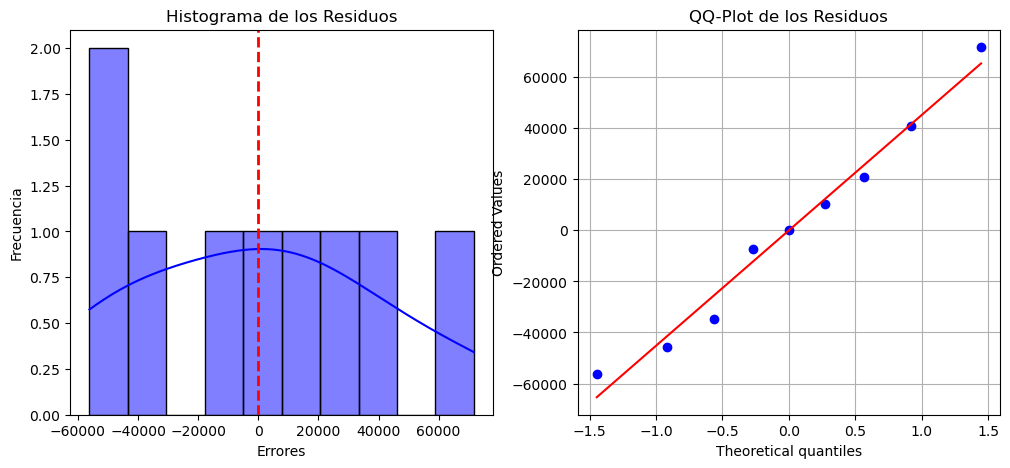

In [91]:
import scipy.stats as stats  

# 📌 Histograma de los residuos
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(errores, bins=10, kde=True, color="blue")
plt.axvline(np.mean(errores), color="red", linestyle="dashed", linewidth=2)  # Media
plt.xlabel("Errores")
plt.ylabel("Frecuencia")
plt.title("Histograma de los Residuos")

# 📌 QQ-Plot
plt.subplot(1,2,2)
stats.probplot(errores, dist="norm", plot=plt)
plt.title("QQ-Plot de los Residuos")
plt.grid()
plt.savefig("imagenes/residuos", dpi=300, bbox_inches="tight")

plt.show()


In [78]:
curtosis = stats.kurtosis(errores)
asimetria = stats.skew(errores)

print(f"Curtosis de los residuos: {curtosis:.4f}")
print(f"Asimetría de los residuos: {asimetria:.4f}")


Curtosis de los residuos: -0.8814
Asimetría de los residuos: 0.2423


In [79]:
from scipy.stats import shapiro, kstest

# 📌 Shapiro-Wilk
shapiro_test = shapiro(errores)
print(f"Shapiro-Wilk Test: estadístico={shapiro_test.statistic:.4f}, p-valor={shapiro_test.pvalue:.4f}")

# 📌 Kolmogorov-Smirnov
ks_test = kstest(errores, 'norm', args=(np.mean(errores), np.std(errores)))
print(f"Kolmogorov-Smirnov Test: estadístico={ks_test.statistic:.4f}, p-valor={ks_test.pvalue:.4f}")


Shapiro-Wilk Test: estadístico=0.9713, p-valor=0.9060
Kolmogorov-Smirnov Test: estadístico=0.1464, p-valor=0.9753


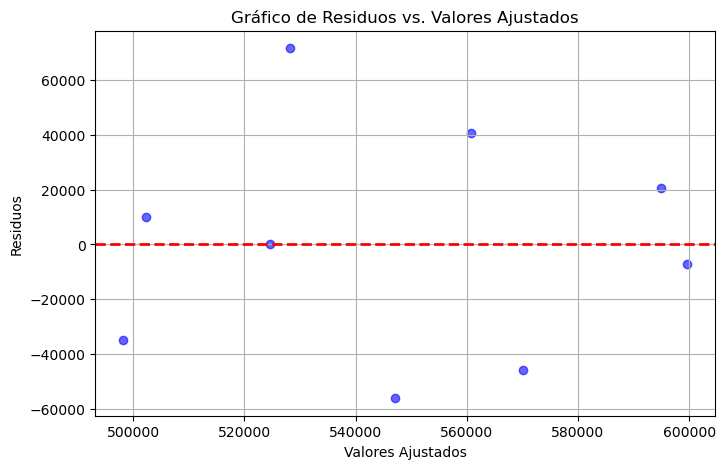

In [92]:
# Calcular los valores estimados del modelo
y_estimado = modelo_ols.predict(X_poly_const)  # X_poly_const es la matriz con términos de regresión

# Calcular los errores (residuos)
errores = Y - y_estimado

# Gráfico de residuos vs valores ajustados
plt.figure(figsize=(8,5))
plt.scatter(y_estimado, errores, color="blue", alpha=0.6)
plt.axhline(y=0, color="red", linestyle="dashed", linewidth=2)
plt.xlabel("Valores Ajustados")
plt.ylabel("Residuos")
plt.title("Gráfico de Residuos vs. Valores Ajustados")
plt.grid()
plt.savefig("imagenes/aleatoriedad_independencia.png", dpi=300, bbox_inches="tight")
plt.show()



In [86]:
import statsmodels.stats.diagnostic as smd

# 📌 Prueba de White
white_test = smd.het_white(errores, X_poly_const)

# Extraer los valores de la prueba
lm_statistic_white = white_test[0]  # Estadístico LM
p_value_white = white_test[1]  # p-valor

# 📌 Mostrar resultados
print(f"📌 Prueba de White para Homocedasticidad:")
print(f"  - Estadístico LM: {lm_statistic_white:.2f}")
print(f"  - p-valor: {p_value_white:.2f}")

# 📌 Interpretación
if p_value_white < 0.05:
    print("🚨 Se rechaza Ho: Hay heterocedasticidad en los residuos.")
else:
    print("✅ No se rechaza Ho: No hay evidencia de heterocedasticidad (homocedasticidad aceptada).")



📌 Prueba de White para Homocedasticidad:
  - Estadístico LM: 3.54
  - p-valor: 0.47
✅ No se rechaza Ho: No hay evidencia de heterocedasticidad (homocedasticidad aceptada).


## **Reporte Gerencial: Análisis de Regresión Polinómica**

### **Objetivo**
El objetivo de este análisis es evaluar la relación entre el número de clientes y los ingresos en COP mediante un modelo de regresión polinómica de grado 2 y analizar el cumplimiento de los supuestos de ANOVA.

### **Resultados**
- El modelo sigue la tendencia general de los datos, aunque en algunos casos sobreestima o subestima los valores observados.
- La variabilidad explicada no supera significativamente la variabilidad no explicada, lo que sugiere la necesidad de incluir variables adicionales como temporada del año, día de la semana y hora para mejorar la precisión del modelo.
- El **p-valor** permite rechazar la hipótesis nula (H₀), lo que indica que el modelo representa adecuadamente el efecto del número de clientes sobre los ingresos.

### **Intervalos de Confianza y Predicción**
- Se calcularon los intervalos al **95% y 90%**, mostrando que el modelo es relativamente preciso en el corto plazo, aunque presenta mayor incertidumbre en el largo plazo.

### **Error de Predicción**
- Se evaluó la diferencia entre los valores observados (Y) y los estimados (Ŷ), encontrando que el modelo no presenta un **sesgo sistemático**, aunque sí errores considerables en algunos casos.

### **Supuesto de Aleatoriedad e Independencia**
- Se utilizó la **estadística Durbin-Watson (DW)**, encontrando **reservas** sobre la independencia de los residuos.
- Al analizar el gráfico de residuos, se observó un comportamiento polinómico, por lo que se probó un modelo de grado 3 (**X³**), pero:
  - Los valores de **DW cambiaron levemente**, y la gráfica mantuvo su forma.
  - En ambos casos (**X² y X³**), **no se puede afirmar con certeza que los residuos son independientes**, pero tampoco se rechaza de inmediato la independencia.
  - Es probable que el problema se deba a la **omisión de variables relevantes** y no necesariamente a la forma del modelo.
  - Se recomienda incluir más **variables explicativas** (horario, día de la semana, eventos especiales, etc.).

### **Supuesto de Normalidad**
- Se analizaron la **curtosis y el coeficiente de asimetría**, los cuales están dentro de los valores aceptables.
- Se concluye que los residuos siguen una **distribución normal**, por lo que **no es necesario aplicar transformaciones**.

### **Supuesto de Igualdad de Varianzas (Homocedasticidad)**
- La prueba de homocedasticidad mostró un **p-valor mayor que 0.05**, lo que indica que no se rechaza la hipótesis nula.
- Esto significa que las varianzas de los residuos son **estadísticamente iguales**, cumpliendo el supuesto de varianza constante.

### **Conclusión Final**
El modelo de regresión polinómica de grado 2 representa de manera general la relación entre el número de clientes y los ingresos. Sin embargo, presenta **reservas sobre la independencia de los residuos y la cantidad de variabilidad explicada**. Se recomienda:
1. **Incluir variables adicionales** como temporada, día de la semana y hora para mejorar la precisión del modelo.
2. **Explorar modelos alternativos**, incluyendo regresión con transformaciones o modelos no lineales.
3. **Revisar posibles sesgos en los datos** que puedan estar afectando los supuestos del modelo.

Este análisis es un primer paso para entender la dinámica de los ingresos y establecer una base para modelos más precisos en el futuro.